# Brief Intro to NetworkX

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## UnDirected Graph

In [5]:
g = nx.Graph()

In [6]:
g.add_node('a')  # add
g.add_nodes_from(['b', 'c', 'd', 'f'])
g.remove_node('b') # remove

In [7]:
g.add_edge('a', 'c')
g.add_edges_from([('a', 'd'), ('a', 'f'), ('d', 'f')])

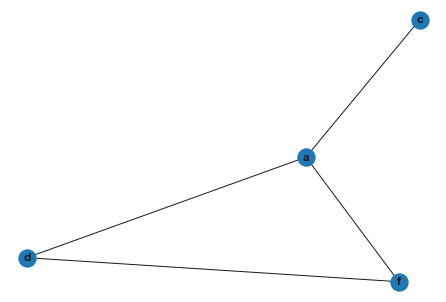

In [11]:
nx.draw(g, with_labels=True, font_weight='bold')

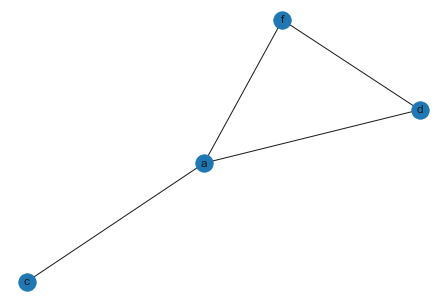

In [13]:
nx.draw(g, pos=nx.spring_layout(g), with_labels=True)

## Weighted un-directed graph

In [28]:
g = nx.Graph()

In [29]:
g.add_nodes_from([c for c in 'abcdefgh'])
g.add_weighted_edges_from([(c1, c2, (i+1)**2) for i, c1 in enumerate('abcd') for c2 in 'efgh'])

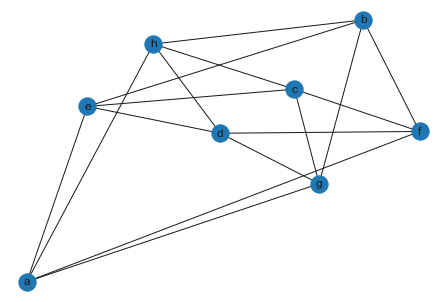

In [30]:
nx.draw(g, with_labels=True)

{('a', 'e'): 1, ('a', 'f'): 1, ('a', 'g'): 1, ('a', 'h'): 1, ('b', 'e'): 4, ('b', 'f'): 4, ('b', 'g'): 4, ('b', 'h'): 4, ('c', 'e'): 9, ('c', 'f'): 9, ('c', 'g'): 9, ('c', 'h'): 9, ('d', 'e'): 16, ('d', 'f'): 16, ('d', 'g'): 16, ('d', 'h'): 16}


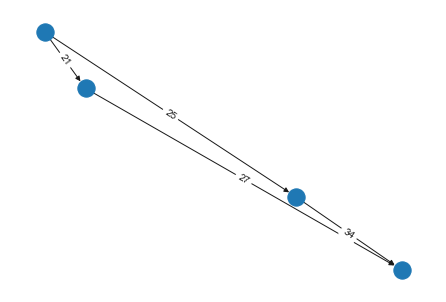

In [74]:
pos=nx.spring_layout(g)
edge_labels = nx.get_edge_attributes(g, 'weight')
print(labels)
nx.draw(g, pos);
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels);

## Directed Graph

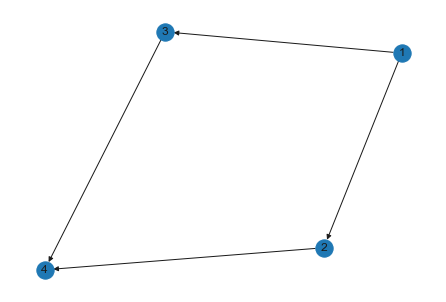

In [53]:
g = nx.DiGraph()

g.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

nx.draw(g, with_labels = True)

### Weighted DiGraph

In [99]:
g = nx.DiGraph()

g.add_weighted_edges_from([('a', 'b', 21), ('a', 'c', 25), ('b', 'd', 27), ('c', 'd', 34)])

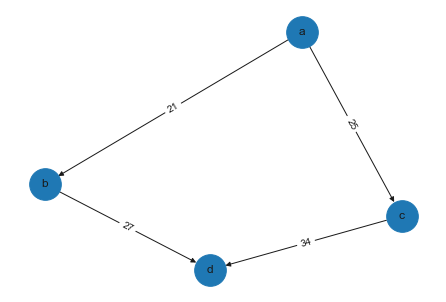

In [109]:
pos=nx.spring_layout(g)                            # create position automatically
nx.draw(g, pos, with_labels=True, node_size=1000);                 # draw nodes with node labels and edges
edge_labels = nx.get_edge_attributes(g, 'weight')  # get edge_labels
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels); # draw edges with edge labels

### degrees : num. of edges connected

In [110]:
g.degree  # number of edges for each node

DiDegreeView({'a': 2, 'b': 2, 'c': 2, 'd': 2})

In [111]:
g.degree['c'] 

2

In [112]:
g.in_degree

InDegreeView({'a': 0, 'b': 1, 'c': 1, 'd': 2})

In [113]:
g.out_degree

OutDegreeView({'a': 2, 'b': 1, 'c': 1, 'd': 0})

In [114]:
g.out_edges

OutEdgeView([('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'd')])

In [115]:
g.in_edges

InEdgeView([('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'd')])

## Pandas Dataframe for NetworkX

In [169]:
df = pd.DataFrame({'from': ['A', 'B', 'C', 'A', 'E', 'D'],
                   'to': ['D', 'A', 'E', 'C', 'A', 'E'],
                   'weight': [1, 2, 3, 4, 5, 6]})
df

,from,to,weight
0,A,D,1
1,B,A,2
2,C,E,3
3,A,C,4
4,E,A,5
5,D,E,6


In [170]:
g = nx.from_pandas_edgelist(df, 'from', 'to', create_using = nx.DiGraph(), edge_attr=True)

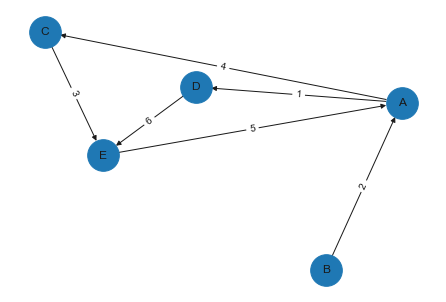

In [198]:
#nx.draw(g, with_labels=True)
pos=nx.spring_layout(g)                            # create position automatically
nx.draw(g, pos, with_labels=True, node_size=1000);                 # draw nodes with node labels and edges
edge_labels = nx.get_edge_attributes(g, 'weight')  # get edge_labels
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels); # draw edges with edge labels

In [163]:
edges = pd.DataFrame(
...     {
...         "source": [0, 1, 2, 0],
...         "target": [2, 2, 3, 2],
...         "my_edge_key": ["A", "B", "C", "D"],
...         "weight": [3, 4, 5, 6],
...         "color": ["red", "blue", "blue", "blue"],
...     }
... )

g = nx.from_pandas_edgelist(
...     edges, source='source', target='target', 
...     edge_key="my_edge_key",
...     edge_attr=["weight", "color"],
...     create_using=nx.DiGraph(),
... )

{(0, 2): 'blue', (2, 3): 'blue', (1, 2): 'blue'}


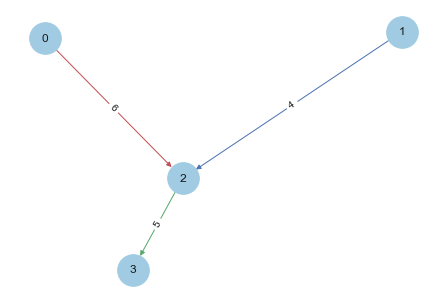

In [168]:
#nx.draw(g, with_labels=True)
pos=nx.spring_layout(g)                            # create position automatically
edge_colors = nx.get_edge_attributes(g, 'color')
print(edge_colors)
nx.draw(g, pos, with_labels=True, node_size=1000, node_color='#A0CBE2', edge_color=['r', 'g', 'b', 'b', 'b'])                 # draw nodes with node labels and edges
edge_labels = nx.get_edge_attributes(g, 'weight')  # get edge_labels
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels); # draw edges with edge labels